In [ ]:
import torch
import torch.nn.functional as F

import locale
import sys
import torchvision
import numpy as np
import glob
from torchvision.transforms import functional as F
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage import io
from skimage.transform import resize
from google.colab.patches import cv2_imshow
from sklearn.metrics import jaccard_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 6.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:03<00:00, 17.2MB/s]


In [ ]:
# train: /content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/train
# val: /content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/valid

# nc: 1

# names: ["defect"]

In [ ]:
!touch data.yaml

In [ ]:
# Set the confidence threshold to 0.5
conf_threshold = 0.5

In [ ]:
model.train(data = "/content/data.yaml",epochs = 40)

Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

In [ ]:
# model =YOLO("/content/runs/detect/train/weights/best.pt")
model = YOLO('/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/best_40.pt')


In [ ]:

# Load the image
image_path = "/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/images/DSC00143_rotated.JPG"


image = cv2.imread(image_path)

DSC00143_rotated


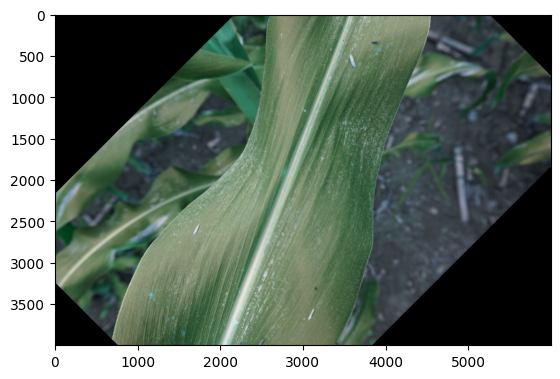

In [ ]:
image_name= image_path.split('/')[-1].split('.')[0]
print(image_name)
plt.imshow(image)

In [ ]:
objects = model.predict(image,conf=0.25,save = True)

for result in objects:
  boxes = result.boxes
  cls = boxes.cls

bbox=boxes.xyxy.tolist()
bbox



0: 448x640 3 defects, 110.3ms
Speed: 19.7ms preprocess, 110.3ms inference, 40.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


[[3048.708984375, 3546.40966796875, 3140.096923828125, 3697.94091796875],
 [1660.628662109375, 2529.3486328125, 1756.225830078125, 2673.3857421875],
 [3554.588623046875, 471.934326171875, 3635.457275390625, 642.6906127929688]]

In [ ]:
bbox

[[2121.10888671875, 2185.433349609375, 2435.838134765625, 2771.205078125],
 [3098.681640625, 3120.105712890625, 3283.742919921875, 3207.328125]]

In [ ]:
# infer.predict("/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/images",save = True)

# SAM

In [ ]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

In [ ]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

# Set the locale to UTF-8
!export LC_ALL=en_US.UTF-8
!export LANG=en_US.UTF-8


!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-x5iv70se
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-x5iv70se
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36588 sha256=f32b1c868a5b83b510b49c5692a383af158eac0a897bc09cd24cf951c35c7ce4
  Stored in directory: /tmp/pip-ephem-wheel-cache-zvrme0kj/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-08-07 04:25:28--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.106, 52.84.251.114, 

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor=(255/255, 102/255, 102/255), facecolor=(0, 0, 0, 0), lw=2))


In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)


In [ ]:
predictor.set_image(image)

# Evaluating Mask IoUs



### SAM for 1 or 2 masks

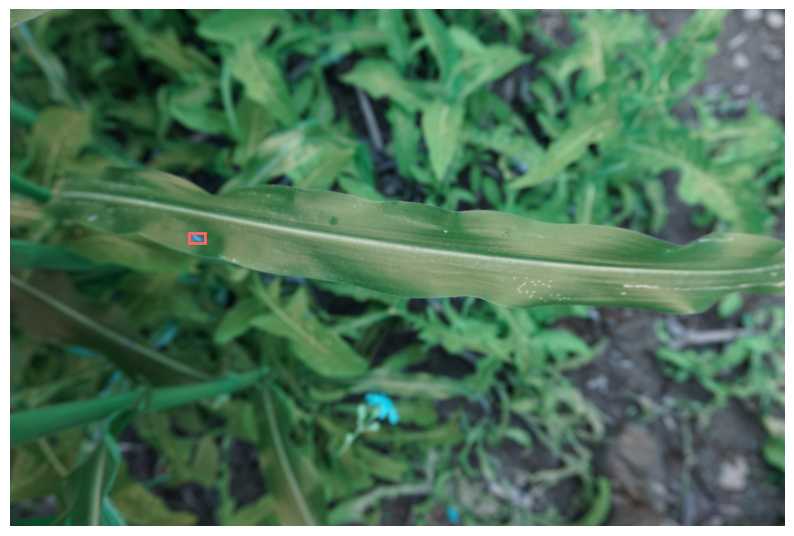

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Iterate over each bounding box
all_masks = []
for input_bbox in bbox:
    input_bbox_np = np.array(input_bbox)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_bbox_np[None, :],
        multimask_output=False,
    )

    # Append the masks to the list
    all_masks.append(masks)

# Visualize all the masks together
for masks, input_bbox in zip(all_masks, bbox):
    # Visualize the bounding box for each object
    show_box(input_bbox, plt.gca())

    # Visualize the mask for each object
    show_mask(masks[0], plt.gca())

output_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/OutPut_Images'
output_path = os.path.join(output_folder,f"{image_name}.png")
# plt.savefig(output_path, bbox_inches='tight')
plt.axis('off')
plt.show()

In [ ]:
for input_bbox in bbox:
    input_bbox_np = np.array(input_bbox)
    print(input_bbox_np)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_bbox_np[None, :],
        multimask_output=False,
    )


[     2411.6      3075.6      2576.1      3414.6]
[     3045.9        3554      3141.6      3704.3]
[     1997.4      3456.8      2364.6      3992.3]
[     4234.2      639.99      4529.2      884.04]
[     1657.3      2529.7      1752.4      2674.2]
[     3473.6      1379.7        3559      1593.8]
[     3553.2      480.63      3628.3      646.26]
[     2001.5      3344.9      2083.2      3554.1]
[     880.36      2401.1      1388.8      2767.2]
[     3277.3      1394.7      3369.4      1575.8]
[     2062.5      3525.4      2362.3      3968.7]
[     3862.2      390.92      3949.8      496.14]
[       3990       374.6      4032.7      413.88]


In [ ]:
import cv2

# Iterate over each bounding box and its mask
for input_bbox in bbox:
    input_bbox_np = np.array(input_bbox)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_bbox_np[None, :],
        multimask_output=False,
    )
    print(masks.shape)

    if masks.shape[0] > 0:
        # The predictor is predicting a mask for this bounding box
        mask = masks[0]
        print(f" unique values of the mask {np.unique(masks[0])}")

        # Process the mask as needed
        # ...
    else:
        # The predictor is not predicting a mask for this bounding box
        print("No mask predicted for this bounding box.")


(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]


### Visualize Masks created by SAM

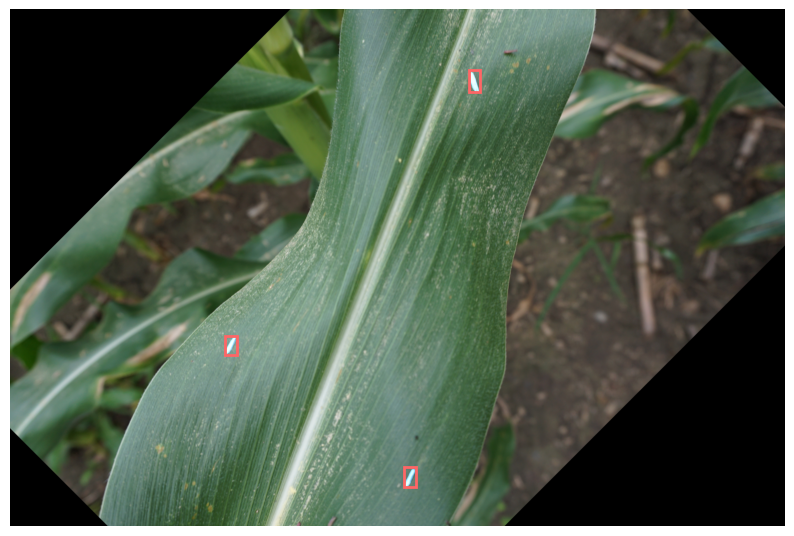

In [ ]:
import cv2

# Create a copy of the original image to store the composite with masks
composite_image = image.copy()

# Iterate over each bounding box and its mask
for input_bbox in bbox:
    input_bbox_np = np.array(input_bbox)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_bbox_np[None, :],
        multimask_output=False,
    )

    # Get the mask for the current object
    mask = masks[0]

    # Convert the mask to a binary mask (0s and 1s) based on a threshold value (0.5)
    binary_mask = mask > 0.5

    # Get the color for the mask (similar to the Segment Anything model)
    color = [30/255, 144/255, 255/255]  # RGB color [30, 144, 255]

    # Apply the color to the binary mask with alpha blending
    alpha = 0.6
    colored_mask = np.zeros_like(image, dtype=np.uint8)
    colored_mask[binary_mask] = (color[2]*224, color[1]*224, color[0]*224)  # Swap color order for BGR format and scale to 0-255

    # Apply alpha blending to overlay the colored mask on the original image
    composite_image = cv2.addWeighted(composite_image, 1, colored_mask, alpha, 0)

# Visualize the composite image with all the masks and bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(composite_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.axis('off')

# Iterate over each bounding box and plot it on the composite image
for input_bbox in bbox:
    # Visualize the bounding box for each object
    show_box(input_bbox, plt.gca())

# Save the composite image with all the masks
output_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/OutPut_Images'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, f"{image_name}_masks_overlay.png")
# plt.savefig(output_path, bbox_inches='tight')

plt.show()


# **Create Pred_Masks**

In [ ]:
import os
import cv2
import numpy as np


# Set paths
test_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/images'  # Update with your test image folder path
output_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/Output_masks'  # Update with the folder where you want to save predicted masks

# Define the color for the mask (purple)
mask_color = (255, 0, 255)  # Purple color in (R, G, B) format



# Iterate over images in the test folder
for image_name in os.listdir(test_folder):
    if image_name.endswith('.JPG') or image_name.endswith('.png'):  # Adjust image formats as needed
        image_path = os.path.join(test_folder, image_name)
        image = io.imread(image_path)


        # YOLOV8 PART
        objects = model.predict(image,conf=0.25,save = True)

        for result in objects:
          boxes = result.boxes
          cls = boxes.cls
        bbox=boxes.xyxy.tolist()


        # SAM Model Part
        predictor.set_image(image)

        # Create a blank mask for predicted mask
        predicted_mask = np.zeros_like(image)

        # Iterate over each bounding box and its mask
        for input_bbox in bbox:
            input_bbox_np = np.array(input_bbox)
            masks, _, _ = predictor.predict(
                point_coords=None,
                point_labels=None,
                box=input_bbox_np[None, :],
                multimask_output=False,
            )

            # Get the mask for the current object
            mask = masks[0]

            # Resize predicted mask to match the image size
            resized_mask = resize(mask, (image.shape[0], image.shape[1]), anti_aliasing=False)

            # Overlay the predicted mask on the blank mask
            predicted_mask[resized_mask > 0.5] = mask_color

        # Save the predicted mask as an image
        output_mask_path = os.path.join(output_folder, image_name.replace('.JPG', '.png'))
        io.imsave(output_mask_path, predicted_mask.astype(np.uint8))



0: 448x640 4 defects, 30.8ms
Speed: 4.3ms preprocess, 30.8ms inference, 3.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
<ipython-input-17-f9212a235c50>:58: UserWarning: /content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/Output_masks/DSC00149.png is a low contrast image
  io.imsave(output_mask_path, predicted_mask.astype(np.uint8))

0: 448x640 2 defects, 28.0ms
Speed: 5.6ms preprocess, 28.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
<ipython-input-17-f9212a235c50>:58: UserWarning: /content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/Output_masks/DSC00132.png is a low contrast image
  io.imsave(output_mask_path, predicted_mask.astype(np.uint8))

0: 448x640 (no detections), 28.8ms
Speed: 4.9ms preprocess, 28.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
<ipython-input-17-f9212a235c50>:58: UserWarn

# **Visulaizing The Image , Ground truth mask and Predicted_mask by SAM**

In [ ]:
# Set paths
image_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/images'
predicted_mask_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/Output_masks'
ground_truth_mask_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/Ground_Truth_Mask_TEST'

# Iterate over images in the test folder
for image_name in os.listdir(image_folder):
    if image_name.endswith('.JPG') or image_name.endswith('.png'):  # Adjust image formats as needed
        image_path = os.path.join(image_folder, image_name)
        image = io.imread(image_path)

        # Load predicted mask
        predicted_mask_path = os.path.join(predicted_mask_folder, image_name.replace('.JPG', '.png'))
        predicted_mask = io.imread(predicted_mask_path)

        # Load ground truth mask
        ground_truth_mask_path = os.path.join(ground_truth_mask_folder, image_name.replace('.JPG', '.png'))
        ground_truth_mask = io.imread(ground_truth_mask_path)

        # Create a figure with subplots to visualize the images and masks
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        # Display original image
        axs[0].imshow(image)
        axs[0].set_title('Original Image')
        axs[0].axis('off')

        # Display ground truth mask
        axs[1].imshow(ground_truth_mask, cmap='gray')
        axs[1].set_title('Ground Truth Mask')
        axs[1].axis('off')

        # Display predicted mask
        axs[2].imshow(predicted_mask, cmap='gray')
        axs[2].set_title('Predicted Mask')
        axs[2].axis('off')

        # Show the figure
        plt.tight_layout()
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Compare the Ground Truth Masks and Predicted Masks and Calculate the Iou

In [ ]:
def pixel_accuracy(predicted_image, mask):
    """
    Calculate the pixel accuracy between the predicted image and the ground truth mask.

    Args:
        predicted_image (torch.Tensor): Predicted image tensor of shape (N, C, H, W).
        mask (torch.Tensor): Ground truth mask tensor of shape (N, H, W).

    Returns:
        float: Pixel accuracy between the predicted image and the ground truth mask.

    """
    with torch.no_grad():
        # Convert predicted_image to class predictions
        predicted_image = torch.argmax(F.softmax(predicted_image, dim=1), dim=1)

        # Compare predicted_image with mask to get pixel-wise correctness
        correct = torch.eq(predicted_image, mask).int()

        # Calculate pixel accuracy
        accuracy = float(correct.sum()) / float(correct.numel())

    return accuracy



### With **Jaccard**

In [ ]:
import numpy as np
from skimage import io, color
from sklearn.metrics import jaccard_score

# Set paths to the ground truth and predicted masks
ground_truth_mask_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/Ground_Truth_Mask_TEST/DSC00132_rotated.png'
predicted_mask_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/Output_masks/DSC00132_rotated.png'

# Load ground truth mask
ground_truth_mask = io.imread(ground_truth_mask_path, as_gray=True)
ground_truth_mask_binary = (ground_truth_mask > 0).astype(np.uint8)

# Load predicted mask
predicted_mask = io.imread(predicted_mask_path, as_gray=True)
predicted_mask_binary = (predicted_mask > 0).astype(np.uint8)

# Flatten the binary masks
ground_truth_mask_flat = ground_truth_mask_binary.flatten()
predicted_mask_flat = predicted_mask_binary.flatten()

# Calculate IoU using Jaccard Score
iou = jaccard_score(ground_truth_mask_flat, predicted_mask_flat, average='binary')

print(f'IoU: {iou:.4f}')


IoU: 0.4728


### Custome Function

In [ ]:
# Set paths to the ground truth and predicted masks
ground_truth_mask_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/Ground_Truth_Mask_TEST/DSC00132_rotated.png'
predicted_mask_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/Output_masks/DSC00132_rotated.png'

ground_truth_mask = io.imread(ground_truth_mask_path, as_gray=True)
predicted_mask = io.imread(predicted_mask_path, as_gray=True)

print(ground_truth_mask.shape)
print(predicted_mask.shape)

(4000, 6000)
(4000, 6000)


In [ ]:
def calculate_iou(predicted_mask, ground_truth_mask):
    # Convert to binary masks
    predicted_binary = (predicted_mask > 0).astype(np.uint8)
    ground_truth_binary = (ground_truth_mask > 0).astype(np.uint8)

    intersection = np.logical_and(predicted_binary, ground_truth_binary).sum()
    union = np.logical_or(predicted_binary, ground_truth_binary).sum()

    iou = intersection / (union + 1e-7)
    return iou

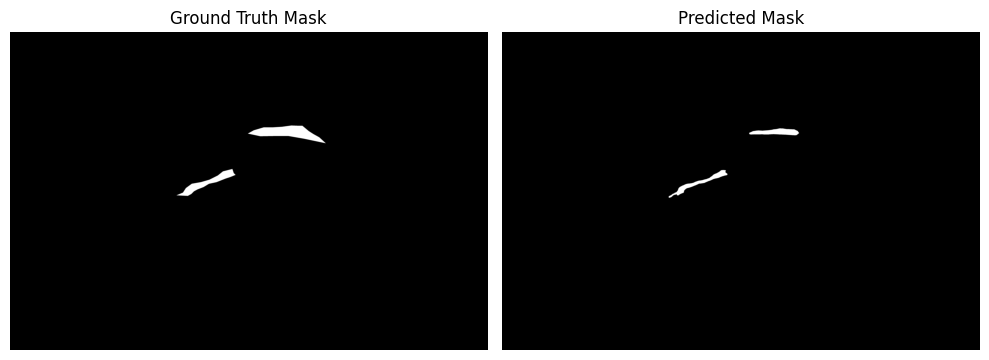

In [ ]:
# Convert masks to binary masks
predicted_binary = (predicted_mask > 0).astype(np.uint8)
ground_truth_binary = (ground_truth_mask > 0).astype(np.uint8)

# Plot the masks side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(ground_truth_binary, cmap='gray')
axes[0].set_title('Ground Truth Mask')
axes[0].axis('off')

axes[1].imshow(predicted_binary, cmap='gray')
axes[1].set_title('Predicted Mask')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
iou = calculate_iou(predicted_mask, ground_truth_mask)
iou

0.4727785013343352

In [ ]:
pixel_accuracy(predicted_mask,ground_truth_mask)


AttributeError: ignored

# **Bounding Box Ground Truth Creation**

### Ground truth Mask Creation

In [ ]:
# Read YOLOv8 format data from text file
def read_yolov8_format(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    annotations = []
    for line in lines:
        class_idx, x_center, y_center, width, height = map(float, line.strip().split())
        annotations.append((int(class_idx), x_center, y_center, width, height))

    return annotations

In [ ]:
# Set paths
image_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/images'
output_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/Ground_Truth_BBOX_TEST'
annotation_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/labels'


In [ ]:
# Create ground truth bounding boxes on images
for image_name in os.listdir(image_folder):
    if image_name.endswith('.JPG') or image_name.endswith('.png'):  # Adjust image formats as needed
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)

        annotation_file_path = os.path.join(annotation_folder, image_name.replace('.JPG', '.txt').replace('.png', '.txt'))
        annotations = read_yolov8_format(annotation_file_path)

        for annotation in annotations:
            class_idx, x_center, y_center, width, height = annotation
            x_min = int((x_center - width / 2) * image.shape[1])
            y_min = int((y_center - height / 2) * image.shape[0])
            x_max = int((x_center + width / 2) * image.shape[1])
            y_max = int((y_center + height / 2) * image.shape[0])

            # Draw bounding box on image
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 12)

        # Save the image with bounding boxes
        output_path = os.path.join(output_folder, image_name)
        cv2.imwrite(output_path, image)



### Making Pred_bbox Image files

In [ ]:
test_image_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/images'
output_bbox_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/Output_bbox'

# Iterate over images in the test folder
for image_name in os.listdir(test_image_folder):
    if image_name.endswith('.JPG') or image_name.endswith('.png'):  # Adjust image formats as needed
        image_path = os.path.join(test_image_folder, image_name)
        image = cv2.imread(image_path)

        # YOLOV8 PART: Predict bounding boxes
        objects = model.predict(image, conf=0.25, save=True)

        for result in objects:
            boxes = result.boxes
            cls = boxes.cls
        bbox = boxes.xyxy.tolist()

        # Create a copy of the original image to draw bounding boxes
        image_with_bboxes = image.copy()

        # Draw predicted bounding boxes on the image
        for box in bbox:
            x_min, y_min, x_max, y_max = map(int, box)
            cv2.rectangle(image_with_bboxes, (x_min, y_min), (x_max, y_max), (0, 0, 255), 12)

        # Save the image with predicted bounding boxes
        output_image_path = os.path.join(output_bbox_folder, image_name)
        cv2.imwrite(output_image_path, image_with_bboxes)


0: 448x640 3 defects, 1935.4ms
Speed: 15.8ms preprocess, 1935.4ms inference, 34.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 4 defects, 1040.0ms
Speed: 5.6ms preprocess, 1040.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 (no detections), 1033.8ms
Speed: 6.4ms preprocess, 1033.8ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 2 defects, 1537.4ms
Speed: 4.5ms preprocess, 1537.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 3 defects, 1749.1ms
Speed: 5.9ms preprocess, 1749.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 2 defects, 1025.3ms
Speed: 4.4ms preprocess, 1025.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs

### Making bbox text file

In [ ]:
import os
import cv2

# Define paths
test_image_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/images'
output_bbox_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/Output_bbox_text'

# Create the output folder if it doesn't exist
os.makedirs(output_bbox_folder, exist_ok=True)

# Iterate over images in the test folder
for image_name in os.listdir(test_image_folder):
    if image_name.endswith('.JPG') or image_name.endswith('.png'):
        # Load the image
        image_path = os.path.join(test_image_folder, image_name)
        image = cv2.imread(image_path)

        # YOLOV8 PART: Predict bounding boxes
        objects = model.predict(image, conf=0.25, save=True)

        # Get the bounding box coordinates and class predictions
        for result in objects:
            boxes = result.boxes
            cls = boxes.cls
        bbox = boxes.xyxy.tolist()

        # Create the output text file
        output_file_path = os.path.join(output_bbox_folder, f'{os.path.splitext(image_name)[0]}.txt')
        with open(output_file_path, 'w') as f:
            for box in bbox:
                # Convert the box coordinates to YOLO format
                x_center = (box[0] + box[2]) / (2.0 * image.shape[1])
                y_center = (box[1] + box[3]) / (2.0 * image.shape[0])
                width = (box[2] - box[0]) / image.shape[1]
                height = (box[3] - box[1]) / image.shape[0]
                class_id = 0

                # Write the bounding box information to the text file
                f.write(f'{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n')





0: 448x640 3 defects, 1637.9ms
Speed: 6.9ms preprocess, 1637.9ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 4 defects, 1059.3ms
Speed: 4.9ms preprocess, 1059.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 (no detections), 1058.0ms
Speed: 5.3ms preprocess, 1058.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 2 defects, 1044.0ms
Speed: 6.0ms preprocess, 1044.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 3 defects, 1035.3ms
Speed: 4.8ms preprocess, 1035.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

0: 448x640 2 defects, 1746.8ms
Speed: 4.4ms preprocess, 1746.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/d

In [ ]:
import os

image_width = 4000  # Width of the image
image_height = 6000  # Height of the image

# Define paths
predicted_bbox_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/Handheld_images/Output_bbox_text'

ground_truth_bbox_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/Handheld_images/test/labels'

# Iterate over the predicted bounding box files
for predicted_bbox_file in os.listdir(predicted_bbox_folder):
    if predicted_bbox_file.endswith('.txt'):
        # Load predicted bounding box coordinates from the text file
        predicted_bbox_path = os.path.join(predicted_bbox_folder, predicted_bbox_file)
        with open(predicted_bbox_path, 'r') as f:
            predicted_bboxes = f.readlines()

        # Load corresponding ground truth bounding box coordinates from the text file
        image_name = os.path.splitext(predicted_bbox_file)[0] + '.png'
        ground_truth_bbox_path = os.path.join(ground_truth_bbox_folder, image_name.replace('.png', '.txt'))

        if os.path.exists(ground_truth_bbox_path):
            with open(ground_truth_bbox_path, 'r') as f:
                ground_truth_bbox = f.readline().strip().split()

            if ground_truth_bbox:
              # Convert YOLO format to [x1, y1, x2, y2] for ground truth
              gt_x_center, gt_y_center, gt_width, gt_height = map(float, ground_truth_bbox[1:])
              gt_x1 = int((gt_x_center - gt_width / 2) * image_width)
              gt_y1 = int((gt_y_center - gt_height / 2) * image_height)
              gt_x2 = int((gt_x_center + gt_width / 2) * image_width)
              gt_y2 = int((gt_y_center + gt_height / 2) * image_height)

              max_iou = 0.0  # Initialize maximum IoU
              # Calculate IoU for each predicted bounding box against the ground truth bounding box
              for pred_bbox_line in predicted_bboxes:
                  pred_bbox = pred_bbox_line.strip().split()

                  # Convert YOLO format to [x1, y1, x2, y2] for predicted
                  pred_x_center, pred_y_center, pred_width, pred_height = map(float, pred_bbox[1:])
                  pred_x1 = int((pred_x_center - pred_width / 2) * image_width)
                  pred_y1 = int((pred_y_center - pred_height / 2) * image_height)
                  pred_x2 = int((pred_x_center + pred_width / 2) * image_width)
                  pred_y2 = int((pred_y_center + pred_height / 2) * image_height)

                  # Calculate intersection area
                  x1 = max(pred_x1, gt_x1)
                  y1 = max(pred_y1, gt_y1)
                  x2 = min(pred_x2, gt_x2)
                  y2 = min(pred_y2, gt_y2)
                  intersection = max(0, x2 - x1) * max(0, y2 - y1)

                  # Calculate union area
                  pred_area = (pred_x2 - pred_x1) * (pred_y2 - pred_y1)
                  gt_area = (gt_x2 - gt_x1) * (gt_y2 - gt_y1)
                  union = pred_area + gt_area - intersection

                  # Calculate IoU
                  iou = intersection / (union + 1e-6)
                  max_iou = max(max_iou, iou)  # Update maximum IoU

              # Print the maximum IoU for the image
              print(f'IoU of {image_name}: {max_iou:.4f}')
        else:
            print(f"No ground truth bounding box found for {image_name}")


IoU of DSC00149.png: 0.9013
IoU of DSC00132.png: 0.9176
IoU of DSC00133.png: 0.7977
IoU of DSC00125.png: 0.3815
IoU of DSC00152.png: 0.0000
IoU of DSC00124_rotated.png: 0.0000
IoU of DSC00133_rotated.png: 0.7111
IoU of DSC00132_rotated.png: 0.9029
IoU of DSC00151_rotated.png: 0.0000
IoU of DSC00122_rotated.png: 0.0011
IoU of DSC00143_rotated.png: 0.7991
IoU of DSC00134_rotated.png: 0.8265
IoU of DSC00149_scaled.png: 0.8734
IoU of DSC00132_scaled.png: 0.9124
IoU of DSC00122_scaled.png: 0.5524
IoU of DSC00146_scaled.png: 0.0000
IoU of DSC00151_flip.png: 0.0000
IoU of DSC00125_flip.png: 0.4224
IoU of DSC00152_flip.png: 0.0000
